In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_down_BTC3.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BTC,down,2018-11-19 16:00:00,CryptoHourly,0,0,NaN,"@#1, Bitcoin with unit price of $5,177.69, mar..."
1,BTC,down,2018-11-19 16:00:00,techhelpkb,0,0,#Bitcoin #Bitcoin #LightningNetwork,Scaling #Bitcoin: A beginner’s guide to the #L...
2,BTC,down,2018-11-19 16:00:00,IAM__Network,3,3,#XERA #XERATECH #crypto #CryptoNews #Cryptoexc...,IAM Platform Curated Retweet: Via: https://twi...
3,BTC,down,2018-11-19 16:00:00,Criptoaldia_,1,1,NaN,Se han conocido cifras en las que se confirma ...
4,BTC,down,2018-11-19 16:00:00,Parlonscrypto,0,0,#Bitcoin #Bitcoin #Ripple #Ethereum #BitcoinCa...,"La bourse suisse, Six Swiss Exchange (@sixgrou..."
...,...,...,...,...,...,...,...,...
12607,BTC,down,2018-11-19 21:59:46,BijanBina,1,3,NaN,Bitcoin is a secure architecture for money. It...
12608,BTC,down,2018-11-19 21:59:47,ericdavis221,0,0,NaN,"Bitcoin is $4,901.00 This is going to cause a ..."
12609,BTC,down,2018-11-19 21:59:52,UrsieBlue,0,1,#bitcoin #bitcoin #crypto,Its actually exciting and terrifiying at the s...
12610,BTC,down,2018-11-19 21:59:57,BorisCrypto,0,0,#btc #btc #bitcoin #bitcoin,"$BTC RSI &lt; 12 in 1D chart, and some guys ar..."


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=str(x) ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0        [@, 1, ,, bitcoin, with, unit, price, of, $, 5...
1        [scaling, bitcoin, :, a, beginner, ’, s, guide...
2        [iam, platform, curated, retweet, :, via, :, h...
3        [se, han, conocido, cifras, en, las, que, se, ...
4        [la, bourse, suisse, ,, six, swiss, exchange, ...
                               ...                        
12607    [bitcoin, is, a, secure, architecture, for, mo...
12608    [bitcoin, is, $, 4,901.00, this, is, going, to...
12609    [its, actually, exciting, and, terrifiying, at...
12610    [$, btc, rsi, &, lt, ;, 12, in, 1d, chart, ,, ...
12611    [the, pump, to, melt, the, faces, of, the, bot...
Name: text, Length: 12612, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0        [,, bitcoin, unit, price, $, ,, market, cap, $...
1        [scaling, bitcoin, :, beginner, ’, guide, ligh...
2        [iam, platform, curated, retweet, :, :, hornet...
3        [se, han, conocido, cifras, las, que, se, conf...
4        [la, bourse, suisse, ,, swiss, exchange, (, @,...
                               ...                        
12607    [bitcoin, secure, architecture, money, ., netw...
12608    [bitcoin, $, going, cause, buying, frenzy, wor...
12609    [exciting, terrifiying, time, ., good, havent,...
12610    [$, btc, rsi, lt, ;, chart, ,, guys, selling, ...
12611    [pump, melt, faces, bottom, sellers, going, ad...
Name: text, Length: 12612, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

17807

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

17807


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

17807

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

17807

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

1370.4115813012847

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.007042227384126187

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

8.627217931870382

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.36136072874069214, 0.7385939955711365, -0....",bitcoin,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.007042,0.944272,0.062770,NaN
16,"[-0.27312958240509033, 0.7645043134689331, -0....",crypto,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.022831,0.150068,0.872763,NaN
2,"[-0.3419795036315918, 0.9188457131385803, -0.6...",price,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.024463,0.094415,0.930048,NaN
105,"[-0.17923960089683533, 0.7667399048805237, -0....",cryptocurrency,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.043708,0.103771,0.939936,NaN
19,"[-0.2541577219963074, 0.7828768491744995, -0.3...",blockchain,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.031046,0.085970,0.945076,NaN
3,"[-0.5579416751861572, 0.6876718997955322, -0.4...",market,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.007797,0.060878,0.946919,NaN
20,"[-0.41983941197395325, 0.6820141077041626, -0....",news,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.013528,0.054984,0.958543,NaN
54,"[-0.45023202896118164, 0.7105588912963867, -0....",cryptocurrencies,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.016215,0.031411,0.984804,NaN
897,"[-0.5309339761734009, 0.5519434213638306, -0.6...",fall,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.048827,0.059723,0.989104,NaN
49,"[0.06921998411417007, 0.8856817483901978, -0.2...",ethereum,0,"[-0.022450345, 0.04437187, -0.027330779, -0.01...",0.058310,0.069019,0.989291,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
404,"[-0.27736952900886536, 0.5639399290084839, -0....",mine,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.007743,0.029831,0.977912,NaN
186,"[-0.25597670674324036, 0.5958181619644165, -0....",money,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.003075,0.023634,0.979441,NaN
225,"[-0.28907647728919983, 0.5773248672485352, -0....",coin,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.002824,0.017012,0.985813,NaN
465,"[-0.3827826678752899, 0.5411105155944824, -0.2...",good,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.003526,0.017619,0.985906,NaN
62,"[-0.331396222114563, 0.4839566946029663, -0.20...",free,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.004703,0.018288,0.986416,NaN
562,"[-0.3775915801525116, 0.5374279618263245, -0.2...",make,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.002770,0.016283,0.986487,NaN
913,"[-0.3900381326675415, 0.5454773902893066, -0.2...",think,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.005026,0.017923,0.987103,NaN
744,"[-0.30715516209602356, 0.446259468793869, -0.1...",need,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.001397,0.013731,0.987666,NaN
655,"[-0.41483932733535767, 0.5536968111991882, -0....",people,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.007386,0.019260,0.988126,NaN
297,"[-0.2604622542858124, 0.4680299162864685, -0.1...",investment,1,"[-0.017170142, 0.030265048, -0.010974383, -0.0...",0.001582,0.013366,0.988216,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
424,"[-0.44188663363456726, 0.8219375014305115, -0....",para,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.000786,0.013427,0.987359,NaN
333,"[-0.24462389945983887, 0.41517359018325806, -0...",project,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.001542,0.008992,0.992550,NaN
65,"[-0.2185945063829422, 0.3892847001552582, -0.0...",join,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.002316,0.008567,0.993749,NaN
135,"[-0.15604445338249207, 0.3594975471496582, -0....",wallet,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.002446,0.008141,0.994305,NaN
418,"[-0.2774612009525299, 0.5064218640327454, -0.1...",como,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.001615,0.006926,0.994689,NaN
1177,"[-0.22471623122692108, 0.3784990906715393, -0....",help,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.000946,0.006015,0.994931,NaN
746,"[-0.2011685073375702, 0.36441272497177124, -0....",precio,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.002668,0.006865,0.995803,NaN
769,"[-0.1990172415971756, 0.3244974613189697, -0.0...",system,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.001129,0.004921,0.996208,NaN
727,"[-0.14724333584308624, 0.2671571671962738, -0....",smart,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.001629,0.005347,0.996282,NaN
1124,"[-0.18327131867408752, 0.4739771783351898, -0....",dolar,2,"[-0.011196534, 0.02064443, -0.004526942, -0.01...",0.002509,0.006136,0.996373,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5570,"[0.014204775914549828, 0.002559305401518941, -...",xblock,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.049105,0.000425,1.048680,NaN
1407,"[0.004795556887984276, 0.01935861073434353, 0....",newspictures,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.056429,0.001094,1.055335,NaN
2075,"[0.011988548561930656, 0.014685695990920067, -...",bitallcoins,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.057931,0.000365,1.057567,NaN
205,"[0.07317551970481873, 0.23801416158676147, 0.0...",algory,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.074887,0.006379,1.068507,NaN
939,"[0.0016322926385328174, 0.010097585618495941, ...",cryptoupdate,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.075266,0.000122,1.075144,NaN
4231,"[0.01566554419696331, 0.007483286317437887, -0...",主要仮想通貨,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.077989,0.000365,1.077625,NaN
1055,"[0.005367293953895569, 0.008951717987656593, -...",coinnounce,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.079227,0.000122,1.079106,NaN
3505,"[0.009787091985344887, 0.008878301829099655, -...",kodak,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.080068,0.000122,1.079946,NaN
11925,"[0.009356651455163956, 0.0020802211947739124, ...",rippel,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.085629,0.000425,1.085204,NaN
4232,"[0.02650643140077591, 0.016446106135845184, -0...",現在の価格,3,"[0.0026443247, 0.0021454936, 6.206525e-05, 0.0...",0.100104,0.000365,1.099740,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

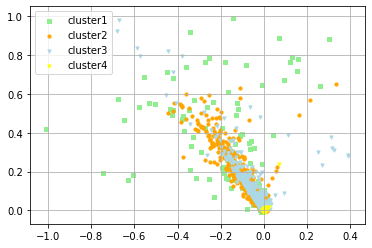

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 부정

945

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

9120

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 비즈

7533

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 투자

209

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 2 # 부정

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 7 # 비즈

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 11 # 투자

In [67]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [68]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [69]:
kmeans.inertia_

1637.7457275390625

In [70]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 0 2 ... 0 0 0]


In [71]:
cluster_values= list(model.wv.vocab)

In [72]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1637.7457275390625


In [73]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [74]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7701419


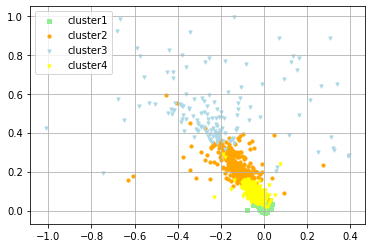

In [75]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [76]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [77]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [78]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [79]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [80]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [81]:
import scipy.spatial.distance as dist

In [82]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [83]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [94]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(60,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
11367,"[-0.009998464956879616, 0.015562599524855614, ...",perguntar,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.025576,0.000061,1.025515,NaN
8185,"[-0.0012268635910004377, 0.016302214935421944,...",dezelfde,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.025740,0.000061,1.025680,NaN
8397,"[-0.005481815431267023, 0.010404783301055431, ...",tear,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026015,0.000122,1.025894,NaN
8333,"[-0.008895695209503174, 0.010639091022312641, ...",dsliza_ok,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026193,0.000061,1.026132,NaN
15480,"[-0.00862339697778225, 0.013740940019488335, -...",continuare,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026331,0.000061,1.026271,NaN
10907,"[-0.002847108291462064, 0.011837215162813663, ...",bildirildi,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026467,0.000061,1.026407,NaN
7300,"[-0.005995095241814852, 0.012991153635084629, ...",qualche,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026577,0.000061,1.026517,NaN
10364,"[-0.00812443159520626, 0.01672414131462574, -0...",ortam,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026611,0.000061,1.026550,NaN
2045,"[-0.0028299489058554173, 0.010531346313655376,...",laeconomica,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026842,0.000061,1.026781,NaN
11282,"[-0.00763877434656024, 0.015654463320970535, 0...",rappelera,0,"[-0.007091391, 0.012391675, -0.003967424, -0.0...",0.026892,0.000061,1.026831,NaN


In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
936,"[-0.12153077125549316, 0.20477606356143951, -0...",record,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.097052,0.002369,1.094683,NaN
1762,"[-0.13099485635757446, 0.21860754489898682, -0...",shit,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.115215,0.003220,1.111995,NaN
1438,"[-0.13109761476516724, 0.20666095614433289, -0...",back,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.136907,0.003099,1.133809,NaN
1745,"[-0.12029299885034561, 0.21019215881824493, -0...",problem,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.138464,0.002734,1.135730,NaN
531,"[-0.10314527153968811, 0.21979960799217224, -0...",cryptos,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.141650,0.002856,1.138795,NaN
477,"[-0.14967623353004456, 0.21747221052646637, -0...",friend,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.148193,0.003645,1.144547,NaN
499,"[-0.09634388983249664, 0.20903001725673676, -0...",number,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.151969,0.003342,1.148628,NaN
220,"[-0.13542641699314117, 0.21859967708587646, -0...",life,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.154291,0.003220,1.151071,NaN
1335,"[-0.12567032873630524, 0.20830917358398438, -0...",gibi,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.158914,0.001276,1.157638,NaN
3941,"[-0.13017261028289795, 0.22687497735023499, -0...",mais,1,"[-0.12777324, 0.2207889, -0.076023005, -0.1439...",0.161356,0.001944,1.159411,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
514,"[-0.2231810837984085, 0.47699880599975586, -0....",dollar,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.256349,0.012941,1.243408,NaN
83,"[-0.2929456830024719, 0.5014481544494629, -0.1...",bank,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.488007,0.010815,1.477193,NaN
214,"[-0.2397555112838745, 0.4756028354167938, -0.1...",bitcoins,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.548058,0.010754,1.537304,NaN
256,"[-0.26555681228637695, 0.4935474991798401, -0....",currency,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.558291,0.016647,1.541643,NaN
857,"[-0.3110482394695282, 0.46327704191207886, -0....",digital,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.601328,0.010146,1.591182,NaN
652,"[-0.22313456237316132, 0.44604572653770447, -0...",investor,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.613740,0.008688,1.605052,NaN
473,"[-0.20154863595962524, 0.47826504707336426, -0...",token,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.646811,0.008141,1.638670,NaN
297,"[-0.2604622542858124, 0.4680299162864685, -0.1...",investment,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.695025,0.013366,1.681659,NaN
518,"[-0.20795109868049622, 0.48187026381492615, -0...",network,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.695627,0.009903,1.685724,NaN
744,"[-0.30715516209602356, 0.446259468793869, -0.1...",need,2,"[-0.2233026, 0.50944686, -0.19980061, -0.22387...",0.714642,0.013731,1.700911,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
7790,"[-0.04624733328819275, 0.07439332455396652, -0...",yatırım,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.032532,0.000425,1.032107,NaN
5624,"[-0.0422685369849205, 0.07022392749786377, -0....",russia,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.032840,0.000365,1.032476,NaN
965,"[-0.04200955480337143, 0.07398045063018799, -0...",legal,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.034253,0.000547,1.033706,NaN
1655,"[-0.043564267456531525, 0.07528024166822433, -...",geld,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.035897,0.000365,1.035532,NaN
794,"[-0.04368431121110916, 0.07767296582460403, -0...",libertad,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.036249,0.000365,1.035885,NaN
2119,"[-0.04088689759373665, 0.0731675997376442, -0....",storage,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.036682,0.000729,1.035953,NaN
4393,"[-0.04960588365793228, 0.07398805022239685, -0...",pull,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.040995,0.001033,1.039962,NaN
5172,"[-0.04334058612585068, 0.07760323584079742, -0...",essa,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.041021,0.000365,1.040657,NaN
2021,"[-0.04799006134271622, 0.07481653988361359, -0...",associate,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.041583,0.000729,1.040854,NaN
75,"[-0.04522717744112015, 0.0736483484506607, -0....",soccer,3,"[-0.042868476, 0.07561673, -0.024926426, -0.05...",0.042792,0.000486,1.042306,NaN


In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #이슈

15713

In [97]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #부정

418

In [98]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #투자

140

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 기타

1536

In [100]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈

In [102]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 부정

In [103]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자

In [104]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [105]:
temp_cluster_result1['Silhouette'] =0.7701419
temp_cluster_result['Silhouette'] = 0.7701419
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [106]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BTC3_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_down_BTC3_cosine")